<a href="https://colab.research.google.com/github/ADITYADEB072003/ML-project/blob/main/Predict_Fuel_Efficiency_Using_Tensorflow_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  
(398, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    in

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,145 (274.00 KB)

 Trainable params: 69,121 (270.00 KB)

 Non-trainable params: 1,024 (4.00 KB)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 23.6502 - mape: 100.4394 - val_loss: 22.3046 - val_mape: 99.4344
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 23.4182 - mape: 99.5028 - val_loss: 22.0080 - val_mape: 97.9297
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 23.1215 - mape: 98.1106 - val_loss: 21.6393 - val_mape: 96.0590
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 22.7441 - mape: 96.4479 - val_loss: 21.1909 - val_mape: 93.7849
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 22.2724 - mape: 93.9597 - val_loss: 20.6379 - val_mape: 90.9824
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 21.6954 - mape: 91.3677 - val_loss: 19.9833 - val_mape: 87.6592
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 21.0046 - mape: 88.0112 - val_loss: 19.2088 - val_mape: 83.7312
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 20.1936 - mape: 84.5777 - val_loss: 18.3150 - val_mape: 79.1978
Epoch 9/50
10/1

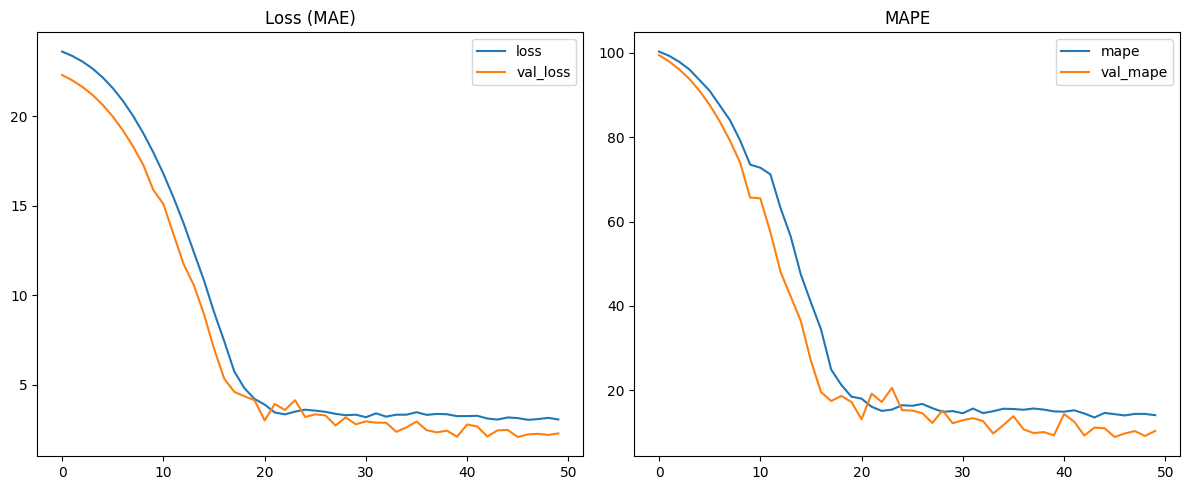

In [ ]:
# ==========================================
# AUTO MPG REGRESSION USING TENSORFLOW
# ==========================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# ==========================================
# 1. LOAD DATA
# ==========================================

df = pd.read_csv('auto-mpg.csv')

print(df.head())
print(df.shape)
print(df.info())

# ==========================================
# 2. DATA CLEANING
# ==========================================

# Remove rows with '?' in horsepower
df = df[df['horsepower'] != '?']
df['horsepower'] = df['horsepower'].astype(float)

# Drop high correlation column
df.drop('displacement', axis=1, inplace=True)

# One-hot encode 'origin'
df = pd.get_dummies(df, columns=['origin'], drop_first=True)

# ==========================================
# 3. FEATURE / TARGET SPLIT
# ==========================================

features = df.drop(['mpg', 'car name'], axis=1)
target = df['mpg']

# ==========================================
# 4. TRAIN-TEST SPLIT
# ==========================================

X_train, X_val, Y_train, Y_val = train_test_split(
    features, target,
    test_size=0.2,
    random_state=22
)

# ==========================================
# 5. FEATURE SCALING (IMPORTANT)
# ==========================================

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# ==========================================
# 6. CREATE DATASETS
# ==========================================

AUTO = tf.data.AUTOTUNE

train_ds = (
    tf.data.Dataset
    .from_tensor_slices((X_train, Y_train))
    .batch(32)
    .prefetch(AUTO)
)

val_ds = (
    tf.data.Dataset
    .from_tensor_slices((X_val, Y_val))
    .batch(32)
    .prefetch(AUTO)
)

# ==========================================
# 7. BUILD MODEL
# ==========================================

model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=[X_train.shape[1]]),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1)   # Linear output for regression
])

model.compile(
    loss='mae',
    optimizer='adam',
    metrics=['mape']
)

model.summary()

# ==========================================
# 8. TRAIN MODEL
# ==========================================

history = model.fit(
    train_ds,
    epochs=50,
    validation_data=val_ds
)

# ==========================================
# 9. PLOT TRAINING HISTORY
# ==========================================

history_df = pd.DataFrame(history.history)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
history_df[['loss', 'val_loss']].plot(ax=plt.gca())
plt.title("Loss (MAE)")

plt.subplot(1,2,2)
history_df[['mape', 'val_mape']].plot(ax=plt.gca())
plt.title("MAPE")

plt.tight_layout()
plt.show()